In [1]:
from pathlib import Path
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import numpy as np
from tqdm.notebook import tqdm
import warnings


In [73]:
with next(iter(sorted(Path("../graphs").iterdir()))).open("rb") as graph_pickle:
    graph = pickle.load(graph_pickle)


In [74]:
graph_df: pd.DataFrame = (
    nx.to_pandas_edgelist(graph)
    .set_index("source")
    .drop(columns="value")
    .sort_values("time")
)
graph_df


,target,time
source,,
b'\xc6\xdd#\x8c\xbc\xd6\x9b-\x1b;\x84\xfd\xa5A\xc1)Xi\xadS',b'v\x1e\r\x95\xb3\xa7\x18\xae\xf6\x82\xdf\x0f\...,20429973
b' \xd4\xcdr\x9dS \xeeB\xce\xef\x11\xc4\xfd\xf1\xbd\x15\xbc\r\x82',b'IE\xce-\x1b[\xd9\x04\xca\xc89\xb7\xfd\xab\xa...,20429973
b'\x10\x8a/\x93\xb8\xe63\x84\x04\xeb\xdf\xc7\x13\xe5\x9a&\xc3I\xa8\xe4',b'\xa0\xb8i\x91\xc6!\x8b6\xc1\xd1\x9dJ.\x9e\xb...,20429973
"b't\x19A\xff29\r|\x15\xb8\x1f""\x19\xa89[\xcb\t\xd4\xe1'","b'\x9a\x10\xda\x8c\xe7\x7f&#\x18`vJ,\xaa\xb3np...",20429973
b'\x11ha\x0f\xda\xa4f\xc2\xed0\x0e\x06B\xc0\x1f\x0cB\xa5g\xda',b'\x1a\xaa=\x9f\x10A\x17\xf0n\xd8\x15\xce\xcc\...,20429973
...,...,...
b'\xbd\xe1\x14\x8e\xec{i9\xf6\xd6\xcc\xf9\xaa\xa0 \xf3\xc0\xbc\xc1\x80',b'\xa4\xcfQ\x971\x10>efCE\xb4\xcb\x04Ko\xb2B\x...,20437137
b'\xa9\xbf\xf58\xa9\x06\x15L\x80\xa8\xdb\xcc\xd2)\xf3\xde\xdd\xfaR\xd6',b'\xda\xc1\x7f\x95\x8d.\xe5#\xa2 b\x06\x99E\x9...,20437137
b'\x9cw\x93\xa0\t\xe9SK\x06J\xcbX\x1b_]w\x12\xbe\xe3S',b'o\x8c\xfbaWqJ@\x9b\xf7\x1f\xa4\xb1\x15\xef\x...,20437137


In [75]:
# This object is reused
vertex_groupby = graph_df.drop(columns="target").groupby("source")

In [76]:
# Count Out Degree
analysis_df = (
    vertex_groupby
    .count()
    .rename(columns={"time": "out_degree"})
)

,out_degree
source,
b'\x00\x00\x00\x00\x00\x00\x07sn/\x9a\xa5c\x0b\x8c\x81.\x1f?\xc9',8
"b'\x00\x00\x00\x00\x00\x000\xe5\x95\x96Yb,\xb7\xebP\xaa \xeeR'",77
b'\x00\x00\x00\x00\x00\x00O=\x8a\xaf\x91u\xfd\x82L\xb0\n\xd4\xbf\x80',5
b'\x00\x00\x00\x00\x00\x00\xdb\x82\x16\xf1\x06\xd6\xf9\xcbp\xa1\xb9\x95M\x1d',2
b'\x00\x00\x00\x00\x00\x01$\xd9\x94 \x9f\xbb\x95^\x02\x17\xb5\xc2\xec\xa1',195
...,...
b'\xff\xff\x82\x15\x86\x8a\x11\xe0\xbf\xc6\x92w\x84\x0b\x07\x83\xd2~0\x0f',1
"b""\xff\xff\x8e\xcc\xf9\x9e\xfb\xa1'-\x08\x10i\xec\x95\xe0b\x9a\x9c\x13""",1
b'\xff\xff\xab\x079-\xbdU\\\x8dFB\x9f\xe1@\x18\xecq\xa5\xa3',16


In [77]:
# Drop out_degree == 1
analysis_df = analysis_df[analysis_df["out_degree"] > 1].copy()
graph_df = graph_df.loc[analysis_df.index].sort_values("time")

,out_degree
source,
b'\x00\x00\x00\x00\x00\x00\x07sn/\x9a\xa5c\x0b\x8c\x81.\x1f?\xc9',8
"b'\x00\x00\x00\x00\x00\x000\xe5\x95\x96Yb,\xb7\xebP\xaa \xeeR'",77
b'\x00\x00\x00\x00\x00\x00O=\x8a\xaf\x91u\xfd\x82L\xb0\n\xd4\xbf\x80',5
b'\x00\x00\x00\x00\x00\x00\xdb\x82\x16\xf1\x06\xd6\xf9\xcbp\xa1\xb9\x95M\x1d',2
b'\x00\x00\x00\x00\x00\x01$\xd9\x94 \x9f\xbb\x95^\x02\x17\xb5\xc2\xec\xa1',195
...,...
b'\xff\xfd\xfe\xf6_\xa8HSLm\x99\xcf\xe2\xd8\xcdk\xfe\x04\x06\x86',2
b'\xff\xfe;]\x943\xf6=\xa6\x92478\xaf\xe8\xdb<I~V',2
b'\xff\xff}\x86:\xb9\xddm;\xc5\xc8\xa5\xac\xed\x9a\xfa\n\x82@\t',2


,target,time
source,,
b'\x8f\xb6\xe7\xe4\x82XJNN\x1a\xf3\xcf\xdcJ\xad8\xed\x98\xdf\x8a',b'\x00\x00\x00\x00\x00\xa3\x9b\xb2r\xe7\x90u\x...,20429973
"b'\xd8\xa31& \xfe,\x08B\x03\x98\xa4\xb3\xe0\x8f\xe6\xad\xe8\xcc\xee'",b'\xd8}\x83V\x00\xb8o\xcbTQ\x9b\x06\xe1\xb3`G\...,20429973
"b'\x00\x19\\\xb4kH\xe1\x06""\xe3\x18\x9d\xd1\xef\xa2\xfd\xc76}O'",b'\xa0\xb8i\x91\xc6!\x8b6\xc1\xd1\x9dJ.\x9e\xb...,20429973
b'\xf7\r\xa9x\x12\xcb\x96\xac\xdf\x81\x07\x12\xaaV-\xb8\xdf\xa3\xdb\xef',b'\xbc@^\xe6\xab\xa4L\xd2\x83\xe2\x91\xd2t0\xb...,20429973
"b'\xf8\x9d{\x9c\x86OX\x9b\xbfS\xa8!\x05\x10v""\xb3^\xaa@'",b'\t\x99\xe2\xf1b(\xcc\xd6+\x08\xceA\xb46\xc18...,20429973
...,...,...
"b""V\xed\xdbz\xa8u6\xc0\x9c\xcc'\x93G5\x99\xfd!\xa8\xb1\x7f""",b'\xda\xc1\x7f\x95\x8d.\xe5#\xa2 b\x06\x99E\x9...,20437137
b'\xf2\t\x9cG\x83\x92\x1fD\xac\x98\x8bg\xe7C\xda\xef\xd4\xa0\x0e\xfd',b'\xb2_\xe7\x8f\xaa\xef\xad\xb7$\x9bI@\xeeHXV\...,20437137
b'\xa9\xbf\xf58\xa9\x06\x15L\x80\xa8\xdb\xcc\xd2)\xf3\xde\xdd\xfaR\xd6',b'\xda\xc1\x7f\x95\x8d.\xe5#\xa2 b\x06\x99E\x9...,20437137


In [78]:
edge_groupby = graph_df.groupby(["source", "target"])

for aggregator in tqdm(
        (np.nanmin, np.nanmax, np.nanmean, np.nanmedian),
        desc="Aggregation", position=0
):
    method_name = aggregator.__name__[len("nan"):]

    for quantile in tqdm([1, 0.99, 0.95, 0.9, 0.75, 0.5], desc=f"Method - {method_name}", position=1):

        def quantile_timedelta_aggregator(series: pd.Series) -> float:
            if series.size < 2:
                return np.nan
            arr = np.diff(series)
            quantile_value = np.nanquantile(arr, quantile)
            arr = arr[arr <= quantile_value]
            if arr.size > 0:
                return aggregator(arr)
            else:
                return np.nan


        col = f"{method_name}_{int(quantile * 100):03}"

        analysis_df.loc[:, f"timedelta_total_{col}"] = (
            vertex_groupby["time"]
            .apply(quantile_timedelta_aggregator)
        )

        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            analysis_df.loc[:, f"timedelta_edge_{col}"] = (
                edge_groupby["time"]
                .apply(quantile_timedelta_aggregator)
                .groupby("target")
                .apply(aggregator)
            )

    analysis_df.loc[:, f"multiplicity_{method_name}"] = (
        edge_groupby["time"]
        .count()
        .groupby("target")
        .apply(aggregator)
    )

analysis_df

Aggregation:   0%|          | 0/4 [00:00<?, ?it/s]

Method - min:   0%|          | 0/6 [00:00<?, ?it/s]

Method - max:   0%|          | 0/6 [00:00<?, ?it/s]

Method - mean:   0%|          | 0/6 [00:00<?, ?it/s]

Method - median:   0%|          | 0/6 [00:00<?, ?it/s]

,out_degree,timedelta_total_min_100,timedelta_edge_min_100,timedelta_total_min_099,timedelta_edge_min_099,timedelta_total_min_095,timedelta_edge_min_095,timedelta_total_min_090,timedelta_edge_min_090,timedelta_total_min_075,...,timedelta_edge_median_099,timedelta_total_median_095,timedelta_edge_median_095,timedelta_total_median_090,timedelta_edge_median_090,timedelta_total_median_075,timedelta_edge_median_075,timedelta_total_median_050,timedelta_edge_median_050,multiplicity_median
source,,,,,,,,,,,,,,,,,,,,,
b'\x00\x00\x00\x00\x00\x00\x07sn/\x9a\xa5c\x0b\x8c\x81.\x1f?\xc9',8,81.0,7.0,81.0,7.0,81.0,7.0,81.0,7.0,81.0,...,7.0,442.5,7.0,442.5,7.0,361.0,7.0,296.0,7.0,1.0
"b'\x00\x00\x00\x00\x00\x000\xe5\x95\x96Yb,\xb7\xebP\xaa \xeeR'",77,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,...,NaN,39.5,NaN,37.5,NaN,26.0,NaN,17.0,NaN,NaN
b'\x00\x00\x00\x00\x00\x00O=\x8a\xaf\x91u\xfd\x82L\xb0\n\xd4\xbf\x80',5,5.0,NaN,5.0,NaN,5.0,NaN,5.0,NaN,5.0,...,NaN,255.0,NaN,255.0,NaN,255.0,NaN,130.0,NaN,NaN
b'\x00\x00\x00\x00\x00\x00\xdb\x82\x16\xf1\x06\xd6\xf9\xcbp\xa1\xb9\x95M\x1d',2,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN
b'\x00\x00\x00\x00\x00\x01$\xd9\x94 \x9f\xbb\x95^\x02\x17\xb5\xc2\xec\xa1',195,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,...,NaN,18.0,NaN,17.0,NaN,13.0,NaN,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b'\xff\xfd\xfe\xf6_\xa8HSLm\x99\xcf\xe2\xd8\xcdk\xfe\x04\x06\x86',2,2082.0,NaN,2082.0,NaN,2082.0,NaN,2082.0,NaN,2082.0,...,NaN,2082.0,NaN,2082.0,NaN,2082.0,NaN,2082.0,NaN,NaN
b'\xff\xfe;]\x943\xf6=\xa6\x92478\xaf\xe8\xdb<I~V',2,17.0,NaN,17.0,NaN,17.0,NaN,17.0,NaN,17.0,...,NaN,17.0,NaN,17.0,NaN,17.0,NaN,17.0,NaN,NaN
b'\xff\xff}\x86:\xb9\xddm;\xc5\xc8\xa5\xac\xed\x9a\xfa\n\x82@\t',2,145.0,NaN,145.0,NaN,145.0,NaN,145.0,NaN,145.0,...,NaN,145.0,NaN,145.0,NaN,145.0,NaN,145.0,NaN,NaN


In [79]:
analysis_df.index = analysis_df.index.map(lambda x: x.hex())
analysis_df.to_csv("analysis.csv")

  0%|          | 0/53 [00:00<?, ?it/s]

/var/folders/sp/0r80nnpx6pj48lbqqwjz3c1m0000gn/T/ipykernel_2690/3811903319.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(27, 18))  # Adjust the layout for both types of columns


KeyboardInterrupt: 

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

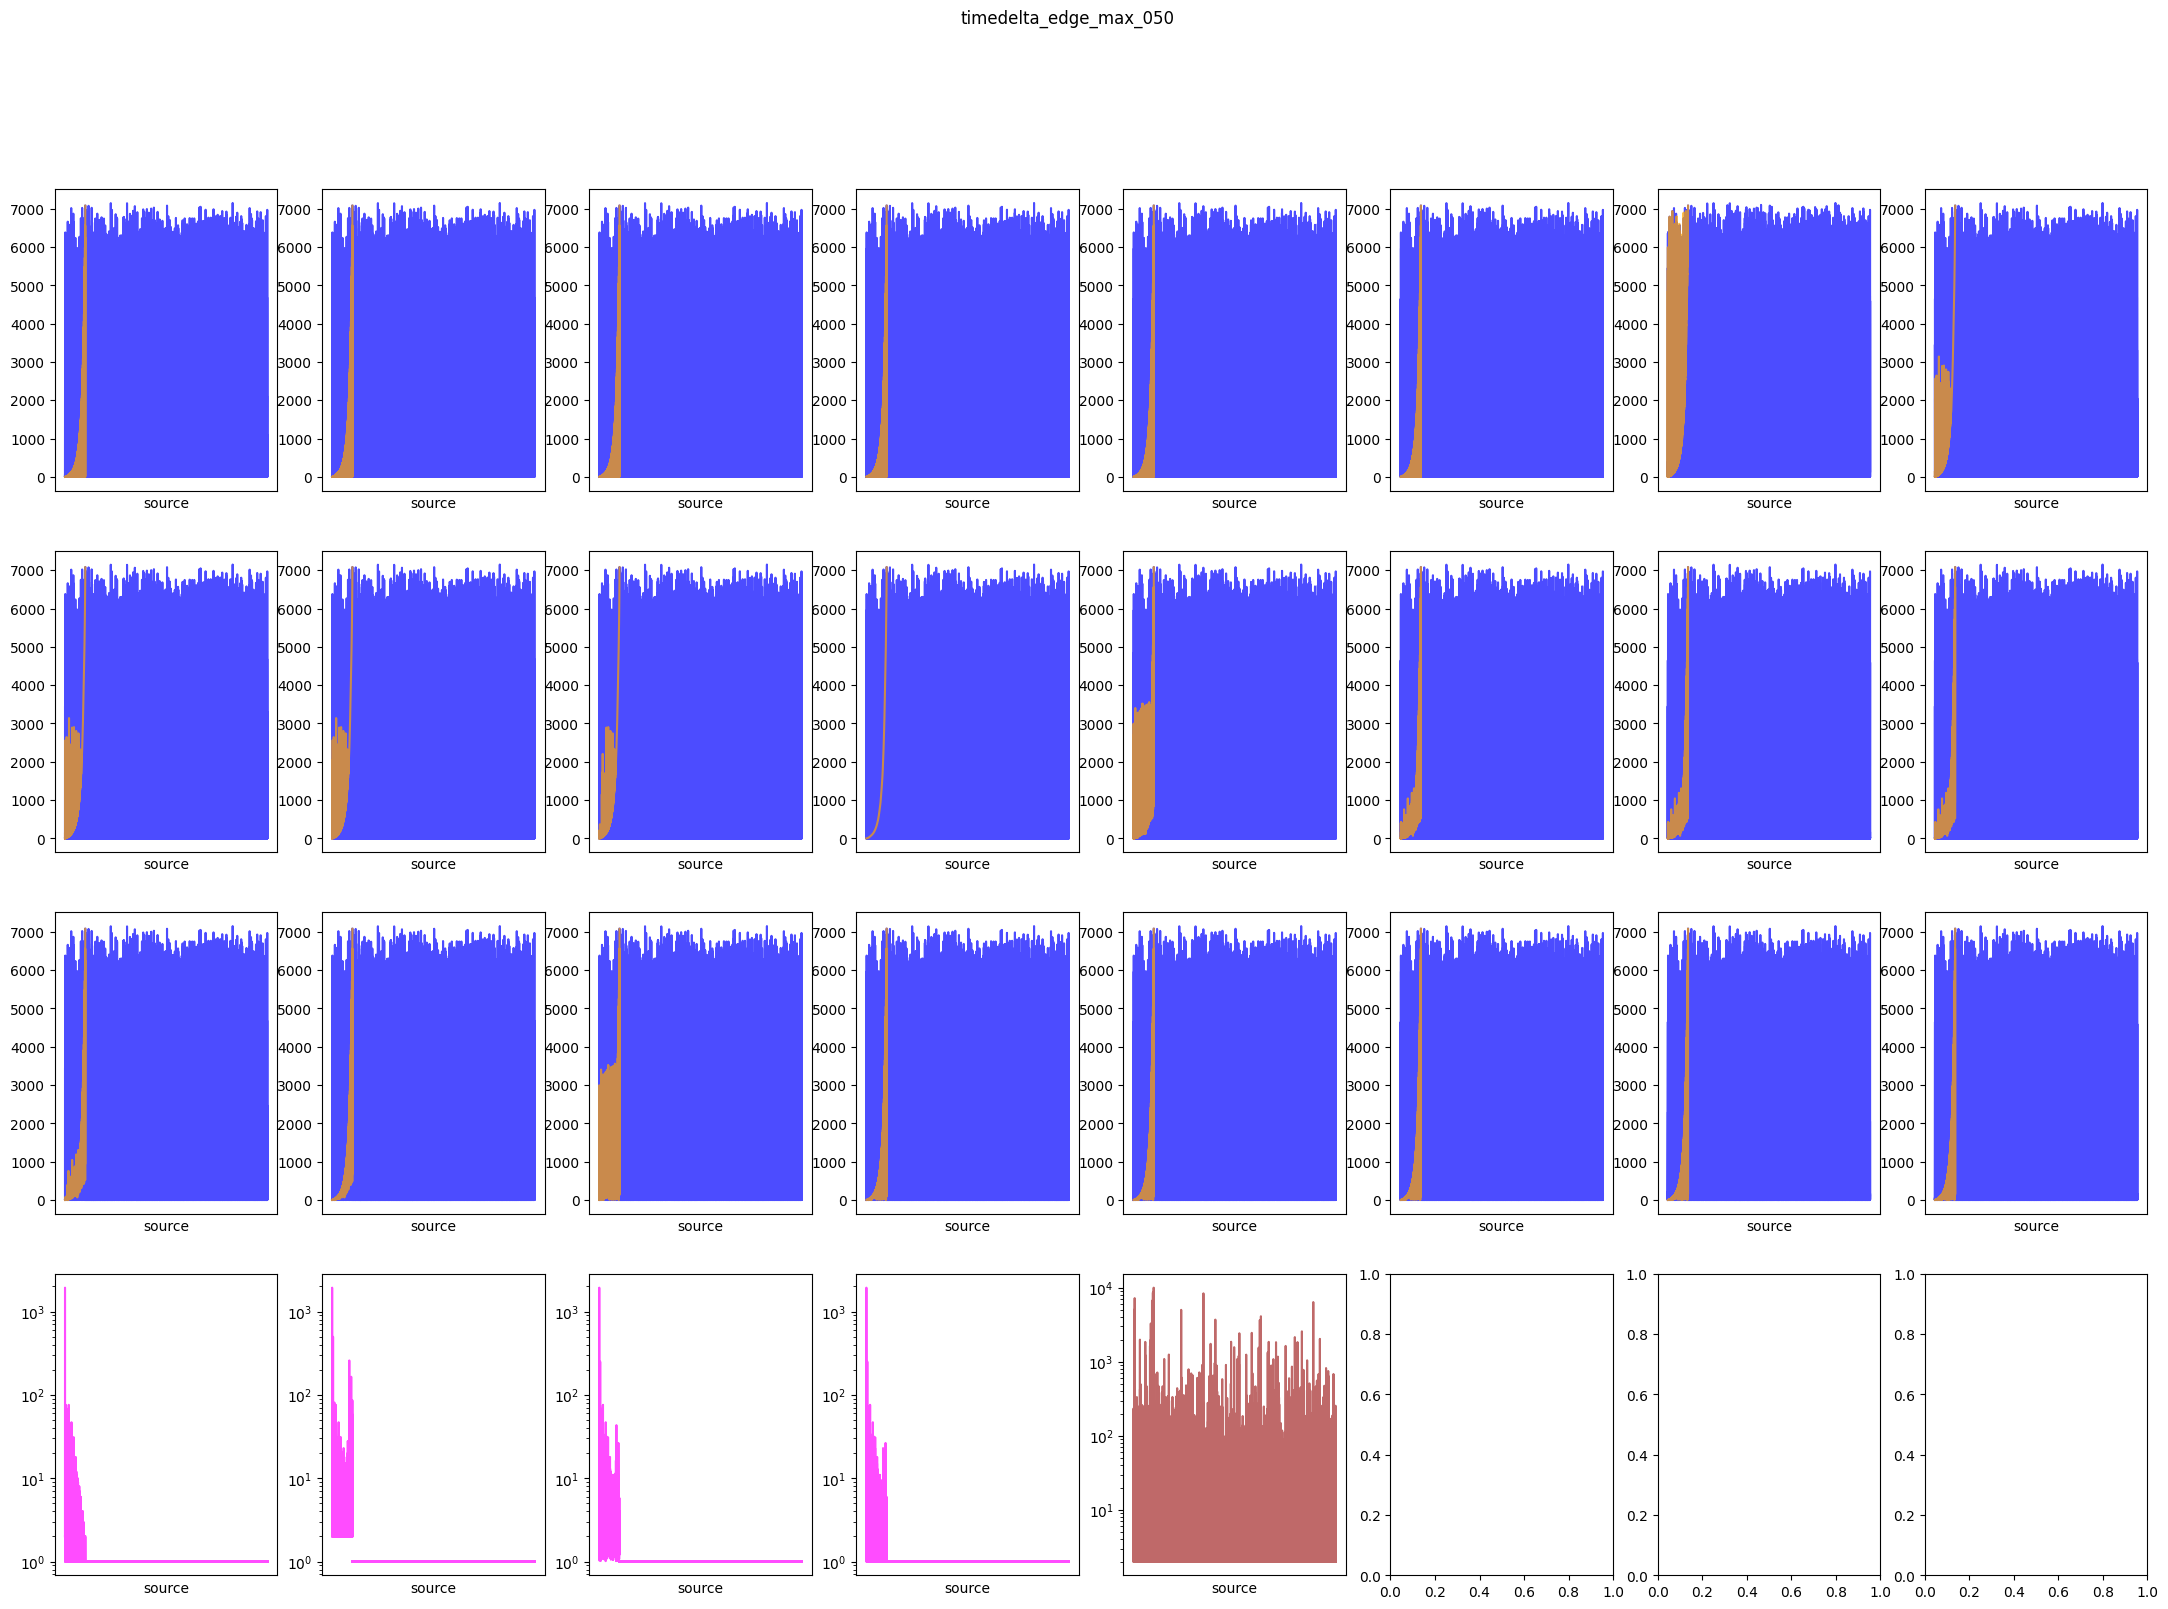

In [5]:
analysis_df = pd.read_csv("analysis.csv", index_col=0)


def human_readable_title(col):
    def long_name(method_name):
        match method_name:
            # case "min":
            #     return "minimum"
            # case "max":
            #     return "maximum"
            case _:
                return method_name

    if col == "out_degree":
        return "Out degree"
    elif col.startswith("multiplicity_"):
        method_name = col[len("multiplicity_"):]
        return f"Mulitplicity of\naggregated {long_name(method_name)}"

    _, agg_object, method_name, quantile = col.split("_")
    return (
            f"Aggregation over\n"
            f"{"vertices" if agg_object == "total" else "directed edges"} using {long_name(method_name)}\n"
            f"the {int(quantile)}% percentile"
        )

# analysis_df = analysis_df.rename(columns={c: human_readable_title(c) for c in analysis_df.columns})

time_delta_subplots = []
degree_subplots = []
color = {}

for method in ("min", "max", "mean", "median"):
    for quantile in ("100", "099", "095", "090", "075", "050"):
        col_total = f"timedelta_total_{method}_{quantile}"
        col_edge = f"timedelta_edge_{method}_{quantile}"
        subplot = (col_total, col_edge)
        time_delta_subplots.append(subplot)
        color[col_total] = "blue"
        color[col_edge] = "orange"

for method in ("min", "max", "mean", "median"):
    col_multiplicity = f"multiplicity_{method}"
    degree_subplots.append((col_multiplicity,))
    color[col_multiplicity] = "magenta"

col_degree = "out_degree"
degree_subplots.append((col_degree,))
color[col_degree] = "brown"

for sort_column in tqdm(analysis_df.columns):
    fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(27, 18))  # Adjust the layout for both types of columns
    axes = axes.flatten()  # Flatten for easier indexing
    sorted_analysis_df = analysis_df.sort_values(sort_column)

    # Loop through selections and handle logy plotting
    plot_index = 0
    for subplots, logy in ((time_delta_subplots, False), (degree_subplots, True)):
        for selected_columns in subplots:
            ax = axes[plot_index]  # Get the current subplot

            # Plot each selected column
            sorted_analysis_df[list(selected_columns)].plot(
                ax=ax,
                color=color,
                logy=logy,
                alpha=0.7,
                title=None,
                legend=None,
            )
            ax.set_xticks([])  # Hide x-ticks
            plot_index += 1

    # Save the entire figure
    fig.suptitle(sort_column)
    plt.subplots_adjust()
    plt.savefig(f"plots/{sort_column}.png", dpi=300)
    plt.clf()

In [ ]:
# Read the CSV
analysis_df = pd.read_csv("analysis.csv", index_col=0)

# Human readable title function
def human_readable_title(col):
    def long_name(method_name):
        match method_name:
            case "min":
                return "minimum"
            case "max":
                return "maximum"
            case _:
                return method_name

    if col == "out_degree":
        return "Out degree"
    
    elif col.startswith("multiplicity_"):
        method_name = col[len("multiplicity_"):]
        return f"Multiplicity {long_name(method_name)}"

    _, agg_object, method_name, quantile = col.split("_")
    return (
        f"{'Vertices' if agg_object == 'total' else 'Directed edges'} {long_name(method_name)} {int(quantile)}% percentile"
    )

# Prepare subplots
time_delta_subplots = []
degree_subplots = []
color = {}

for quantile in ("100", "099", "095", "090", "075", "050"):
    for method in ("min", "max", "mean", "median"):
        col_total = f"timedelta_total_{method}_{quantile}"
        col_edge = f"timedelta_edge_{method}_{quantile}"
        subplot = (col_total, col_edge)
        time_delta_subplots.append(subplot)
        color[col_total] = "blue"
        color[col_edge] = "orange"

for method in ("min", "max", "mean", "median"):
    col_multiplicity = f"multiplicity_{method}"
    degree_subplots.append((col_multiplicity,))
    color[col_multiplicity] = "magenta"

col_degree ="out_degree"
degree_subplots.append((col_degree,))
color[col_degree] = "brown"

# Loop through sorted columns and plot using matplotlib
for sort_column in tqdm(analysis_df.columns):
    fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(27, 18))  # Adjust the layout for both types of columns
    axes = axes.flatten()  # Flatten for easier indexing
    sorted_analysis_df = analysis_df.sort_values(sort_column)

    # Loop through selections and handle logy plotting
    plot_index = 0
    for subplots, logy in ((time_delta_subplots, False), (degree_subplots, True)):
        for selected_columns in subplots:
            ax = axes[plot_index]  # Get the current subplot

            # Plot each selected column manually with ax.plot()
            for column in selected_columns:
                ax.plot(
                    sorted_analysis_df.index, 
                    sorted_analysis_df[column], 
                    color=color[column], 
                    alpha=0.7
                )

            ax.set_title(", ".join(selected_columns))
            ax.set_yscale('log' if logy else 'linear')  # Set y-axis to log if needed
            ax.set_xticks([])  # Hide x-ticks
            plot_index += 1

    # Save the entire figure
    fig.suptitle(f"{human_readable_title(sort_column)} - Sorting")
    plt.subplots_adjust()
    plt.savefig(f"plots/{sort_column}.png", dpi=300)
    plt.clf()

  0%|          | 0/53 [00:04<?, ?it/s]


KeyboardInterrupt: 